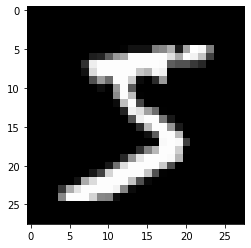

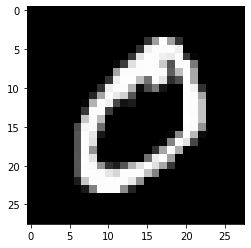

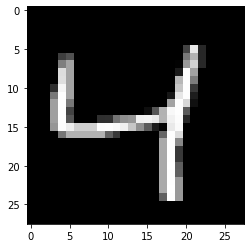

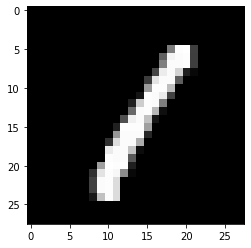

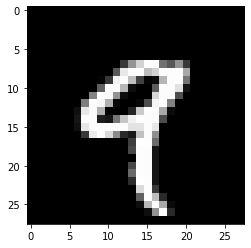

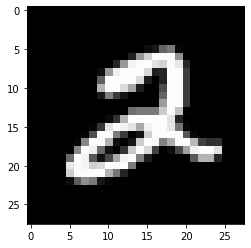

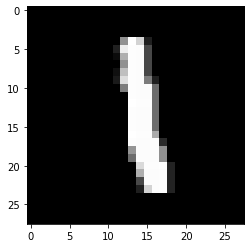

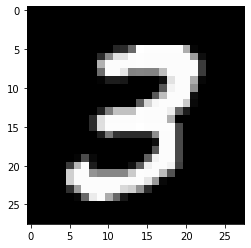

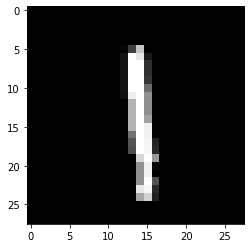

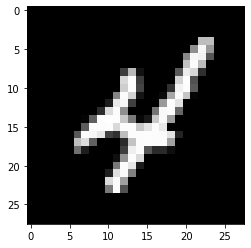

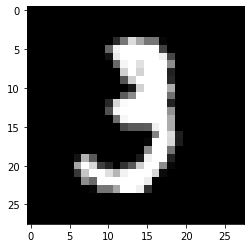

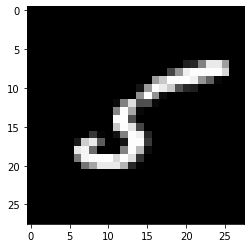

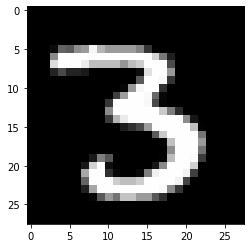

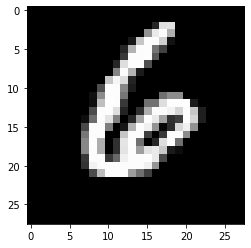

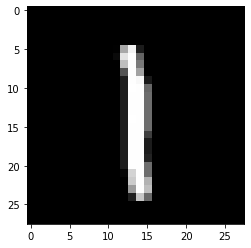

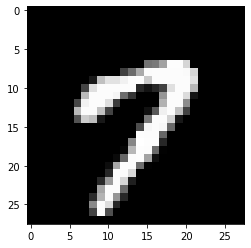

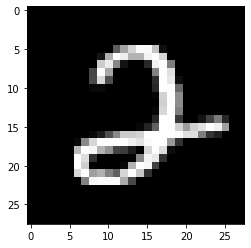

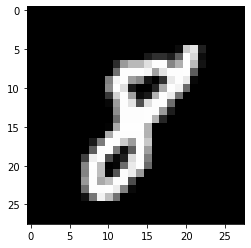

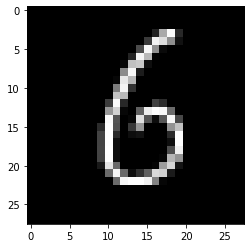

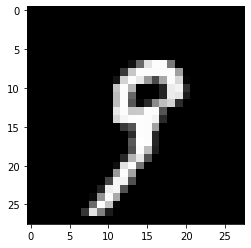

In [2]:
from tensorflow import keras
import matplotlib.pyplot as plt
from matplotlib.image import imread
from sklearn.model_selection import train_test_split
#help(keras.datasets.mnist.load_data)

data = keras.datasets.mnist.load_data(path='mnist.npz')
(x_train, y_train), (x_test, y_test) = data
train_data = data[0]
test_data = data[1]


for _ in range(20):
    image = x_train[_]
    plt.figure()
    plt.imshow(image, cmap='gray')
    

In [3]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [4]:
x_train = x_train.reshape((60000, 28 * 28))
X_test = x_test.reshape((10000, 28*28))

In [5]:
X_train, X_val, Y_train, y_val = train_test_split(x_train, y_train, test_size=0.16, random_state=42) 

In [6]:
X_val.shape

(9600, 784)

In [7]:
from sklearn.preprocessing import MinMaxScaler # Testa båda
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score

import numpy as np

scaler = MinMaxScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_val = scaler.transform(X_val)



y_train.shape, scaled_X_train.shape, scaled_X_val.shape, y_val.shape


((60000,), (50400, 784), (9600, 784), (9600,))

[Text(0.5, 1.0, 'Elbow plot')]

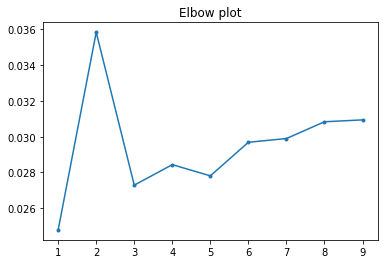

In [8]:

error_list = []

for k in range(1,10):
    model_KNN = KNeighborsClassifier(n_neighbors=k)
    model_KNN.fit(scaled_X_train, Y_train)
    y_pred = model_KNN.predict(scaled_X_val)
    error = 1 - accuracy_score(y_pred, y_val)
    error_list.append(error)

fig, ax = plt.figure(), plt.axes()
ax.plot(range(1,10), error_list, ".-")
ax.set(title = "Elbow plot")


In [9]:
scaled_X_test = scaler.transform(X_test) #FUSK
scaled_x_train = scaler.fit_transform(x_train)

model_KNN = KNeighborsClassifier(n_neighbors=1)
model_KNN.fit(scaled_x_train, y_train)

y_pred = model_KNN.predict(scaled_X_test)
y_pred[:10], np.array(y_test[:10])

(array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8),
 array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8))

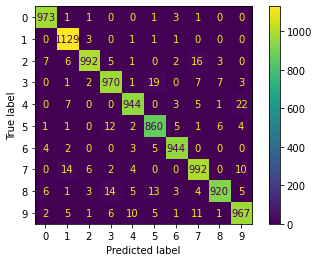

In [10]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

In [11]:
error = 1 - accuracy_score(y_pred, y_test)
error


0.03090000000000004

In [12]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.97      0.99      0.98      1135
           2       0.98      0.96      0.97      1032
           3       0.96      0.96      0.96      1010
           4       0.97      0.96      0.97       982
           5       0.95      0.96      0.96       892
           6       0.98      0.99      0.98       958
           7       0.96      0.96      0.96      1028
           8       0.98      0.94      0.96       974
           9       0.96      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



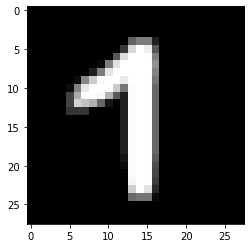

In [13]:
from matplotlib.image import imread

img = plt.imread('my_image6.png')
plt.imshow(img, cmap='gray')

In [14]:
img.shape
shaped_img = img.reshape(1,-1)
shaped_img.shape

(1, 784)

In [19]:
renormalised_shaped_img = (shaped_img * 255).astype(int)

y_pred = model_KNN.predict(renormalised_shaped_img)

y_pred




array([0], dtype=uint8)

In [20]:
y_pred = model_KNN.predict(x_train[0].reshape(1,-1))

y_pred




array([5], dtype=uint8)

In [17]:
renormalised_shaped_img = (shaped_img * 255).astype(int)
renormalised_shaped_img

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,  98, 124, 124,  30,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,  57, 215, 255, 237,
         85,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0

In [18]:
x_train[0].shape

(784,)